In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
data = pd.read_csv(url, sep=';')

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Print list of unique values per feature
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
data['pH']

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [8]:
np.unique(data['pH'])

# we could also use set operator

array([2.74, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.92, 2.93, 2.94, 2.95, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19, 3.2 ,
       3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31,
       3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.41, 3.42,
       3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53,
       3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.61, 3.62, 3.63, 3.66,
       3.67, 3.68, 3.69, 3.7 , 3.71, 3.72, 3.74, 3.75, 3.78, 3.85, 3.9 ,
       4.01])

In [9]:
len(np.unique(data['pH']))

89

In [10]:
for i in data.keys():
    print(f"Column {i} has {len(np.unique(data[i]))} unique values.")

Column fixed acidity has 96 unique values.
Column volatile acidity has 143 unique values.
Column citric acid has 80 unique values.
Column residual sugar has 91 unique values.
Column chlorides has 153 unique values.
Column free sulfur dioxide has 60 unique values.
Column total sulfur dioxide has 144 unique values.
Column density has 436 unique values.
Column pH has 89 unique values.
Column sulphates has 96 unique values.
Column alcohol has 65 unique values.
Column quality has 6 unique values.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


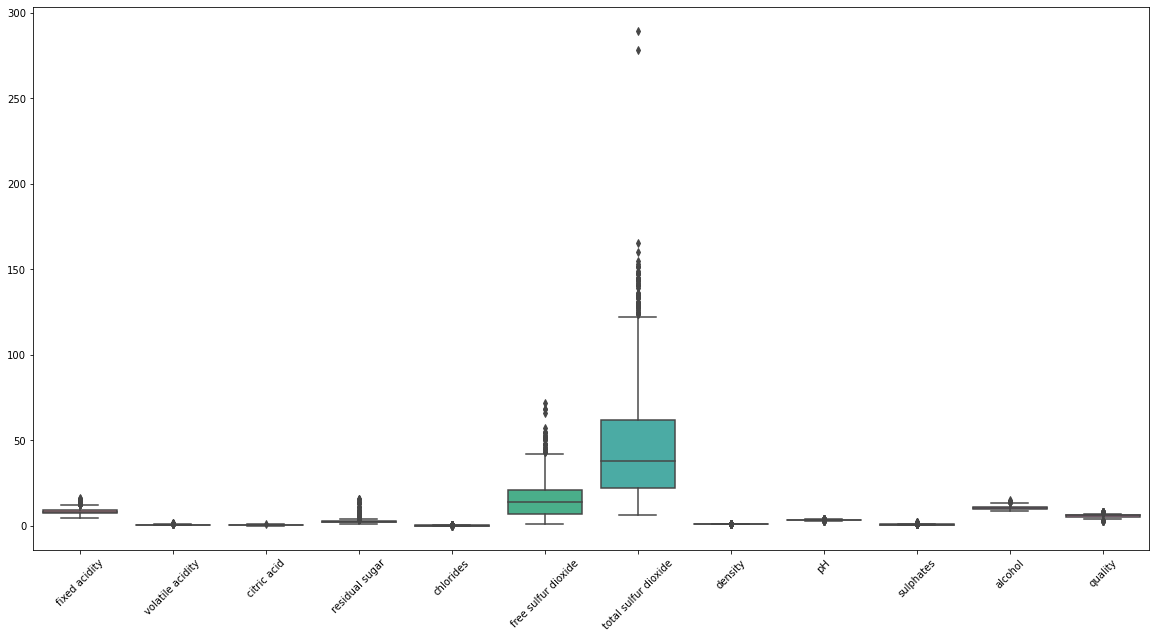

In [11]:
fig, ax = plt.subplots(1, figsize=(20,10))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [12]:
data['total sulfur dioxide']

0       34.0
1       67.0
2       54.0
3       60.0
4       34.0
        ... 
1594    44.0
1595    51.0
1596    40.0
1597    44.0
1598    42.0
Name: total sulfur dioxide, Length: 1599, dtype: float64

In [13]:
data = data[data['total sulfur dioxide'] < 200]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


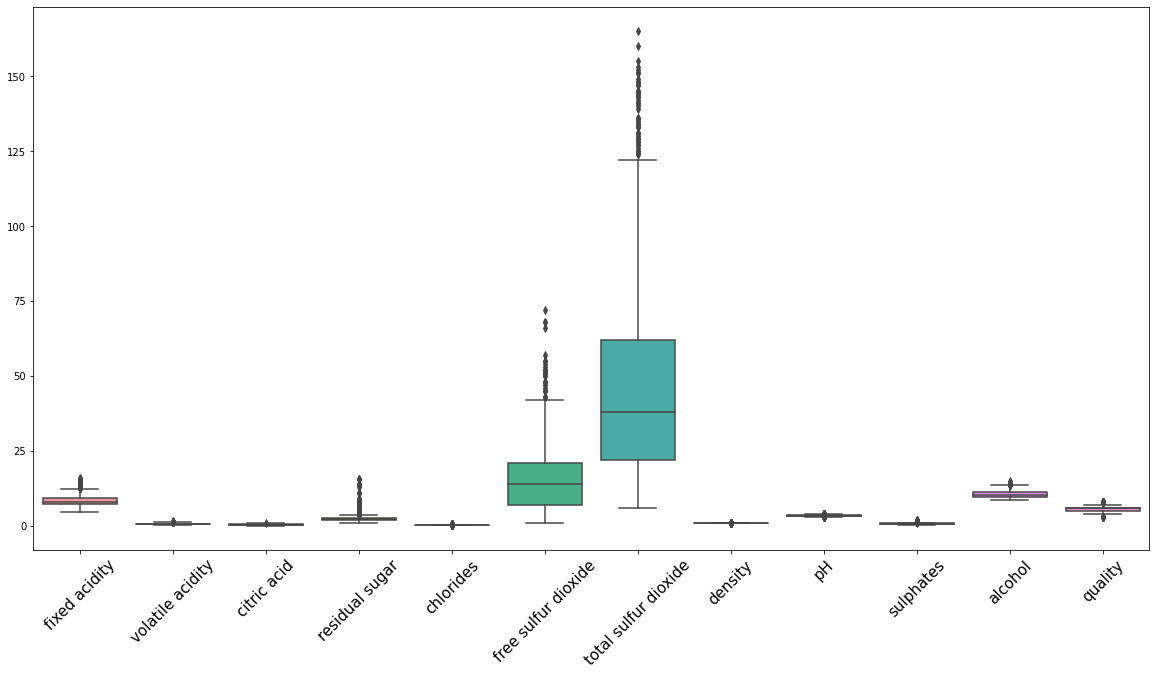

In [14]:
fig, ax = plt.subplots(1, figsize=(20,10))

ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, size= 15)
# ax.set_yticklabels(ax.get_yticklabels(), size= 15)
plt.show()

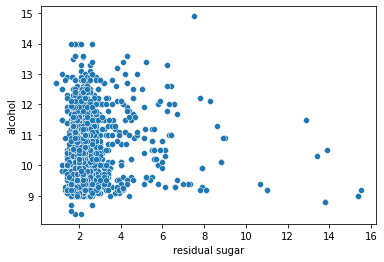

In [15]:
sns.scatterplot(x=data['residual sugar'], y=data['alcohol'])

plt.show()

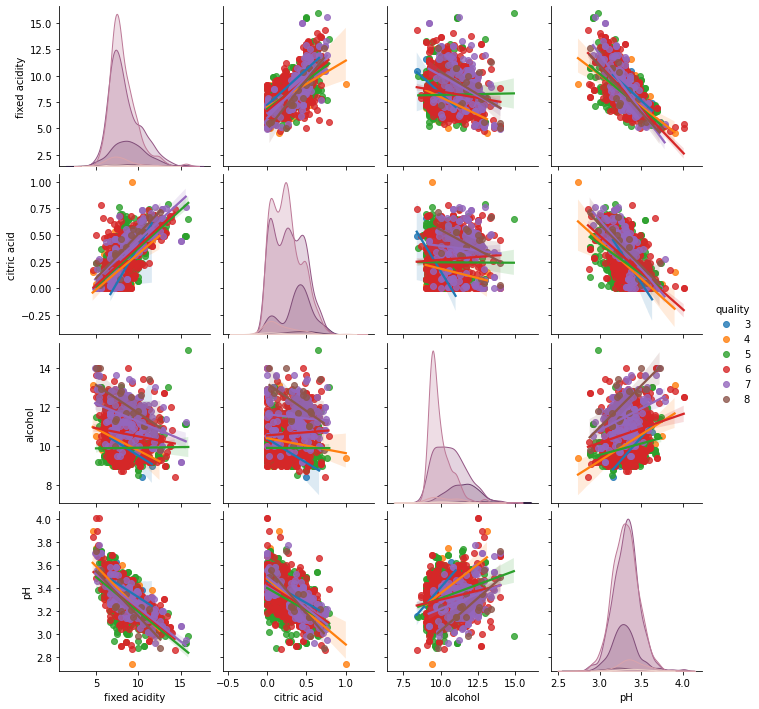

In [16]:
colms2plot = ['fixed acidity','citric acid', 'alcohol', 'pH', 'quality']
sns.pairplot(data[colms2plot], kind='reg', hue= 'quality')

plt.show()

In [17]:
# T-test for acidity on wine quality

# We are going to investigate whether volatile acidity is different wines that were rated
# as quality 3 vs quality 8

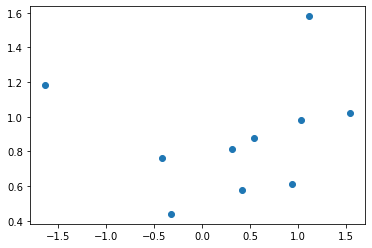

In [24]:
# Extract data

x = data['volatile acidity'][data['quality']==3]
y = data['volatile acidity'][data['quality']==8]

# generate random numbers here fot the x axis coordinates

plt.plot(np.random.randn(len(x)),x,'o')

plt.show()

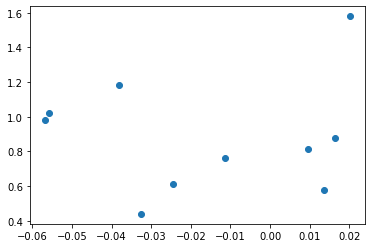

In [25]:
plt.plot(np.random.randn(len(x)) / 30,x,'o')

plt.show()

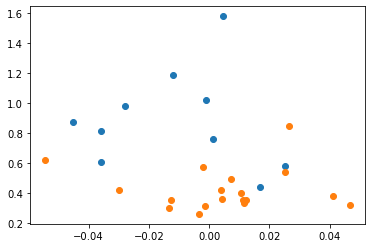

In [26]:
plt.plot(np.random.randn(len(x)) / 30,x,'o',
        np.random.randn(len(y)) / 30, y, 'o')

plt.show()

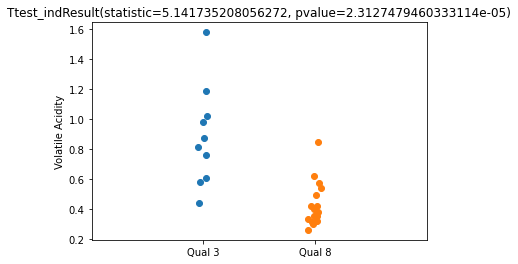

In [31]:
# ttest - independent samples

ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x)) / 30,x,'o',
        np.random.randn(len(y)) / 30 +1, y, 'o')

plt.xlim([-1,2])
plt.xticks([0,1], labels=['Qual 3', 'Qual 8'])
plt.ylabel('Volatile Acidity')
plt.title(f"{ttest}")
plt.show()

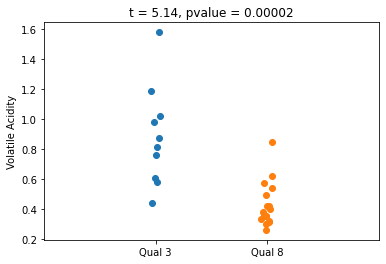

In [33]:
 plt.plot(np.random.randn(len(x)) / 30,x,'o',
        np.random.randn(len(y)) / 30 +1, y, 'o')

plt.xlim([-1,2])
plt.xticks([0,1], labels=['Qual 3', 'Qual 8'])
plt.ylabel('Volatile Acidity')
plt.title(f"t = {ttest[0]:.2f}, pvalue = {ttest[1]:.5f}")
plt.show()

In [34]:
# Making a histogram plot shows the number of times that each of these quality metrics or quality
# values appears in our data set.

# 2 way will be shown

In [35]:
# Longer way

In [36]:
qualcounts = np.zeros(6) # we know that 6 unique quality column

data[data['quality'] == 3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [37]:
len(data[data['quality'] == 3])

10

In [39]:
for i in range(3,9):
    qualcounts[i] = len(data[data['quality'] == i])

qualcounts

IndexError: index 6 is out of bounds for axis 0 with size 6

In [40]:
n = 0

for i in range(3,9):
    qualcounts[n] = len(data[data['quality'] == i])
    n += 1

qualcounts

array([ 10.,  53., 681., 638., 197.,  18.])

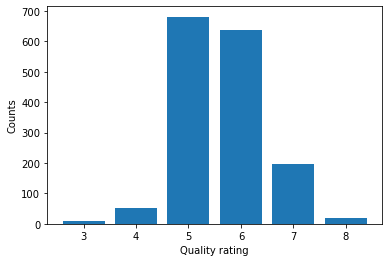

In [41]:
plt.bar(range(3,9), qualcounts)
plt.xlabel('Quality rating')
plt.ylabel('Counts')

plt.show()

In [42]:
# Easy Way

In [43]:
counts = data['quality'].value_counts()

In [44]:
counts

5    681
6    638
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

In [46]:
list(counts.keys())

[5, 6, 7, 4, 8, 3]

In [47]:
counts

5    681
6    638
7    197
4     53
8     18
3     10
Name: quality, dtype: int64

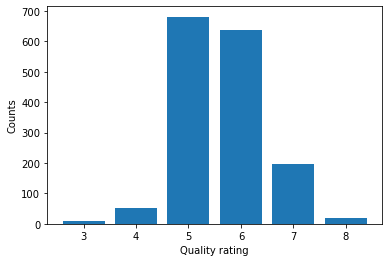

In [49]:
plt.bar(list(counts.keys()), counts)
plt.xlabel('Quality rating')
plt.ylabel('Counts')

plt.show()

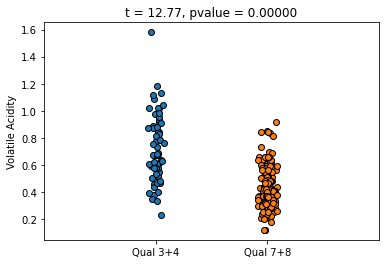

In [55]:
x = data['volatile acidity'][(data['quality']==3) | (data['quality']==4) ]
y = data['volatile acidity'][(data['quality']==7) | (data['quality']==8)]

# ttest - independent samples

ttest = stats.ttest_ind(x,y)

plt.plot(np.random.randn(len(x)) / 30,x,'o',
        np.random.randn(len(y)) / 30 +1, y, 'o',
        markeredgecolor = 'k')

plt.xlim([-1,2])
plt.xticks([0,1], labels=['Qual 3+4', 'Qual 7+8'])
plt.ylabel('Volatile Acidity')
plt.title(f"t = {ttest[0]:.2f}, pvalue = {ttest[1]:.5f}")
plt.show()

In [56]:
# Multiple Regression

# P values tell us whether each of these individual predictors is statistically significant

# If the P value is smaller than .05 then ve consider that feature is significantly predictive of
# the wine quality

In [57]:
import statsmodels.api as sm

In [58]:
dependent_var = data['quality']
independent_var = data.drop(labels='quality')
independent_var

KeyError: "['quality'] not found in axis"

In [59]:
dependent_var = data['quality']
independent_var = data.drop(labels='quality',axis=1)
independent_var

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [60]:
model = sm.OLS(dependent_var, independent_var).fit() #endog = response variable     
# OLS = Ordinary Leased Squares, That is an algoritm computing multiple regression

In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Sun, 02 Apr 2023   Prob (F-statistic):                        0.00
Time:                        23:51:41   Log-Likelihood:                         -1564.8
No. Observations:                1597   AIC:                                      3152.
Df Residuals:                    1586   BIC:                                      3211.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [63]:
dependent_var = data['quality']
independent_var = data.drop(labels='quality',axis=1)

independent_var = sm.add_constant(independent_var)

model = sm.OLS(dependent_var, independent_var).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     81.47
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          1.30e-145
Time:                        23:53:44   Log-Likelihood:                -1564.5
No. Observations:                1597   AIC:                             3153.
Df Residuals:                    1585   BIC:                             3218.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1410 

In [64]:
# Try to access P Values column so we can identify which of these elements is less than point  0.5

In [65]:
model.pvalues<.05

const                   False
fixed acidity           False
volatile acidity         True
citric acid             False
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                 False
pH                       True
sulphates                True
alcohol                  True
dtype: bool

In [66]:
model.pvalues[model.pvalues<0.05].keys()

# Above line code says what columns are have a value of true

Index(['volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [69]:
significant_columns = list(model.pvalues[model.pvalues<0.05].keys())

print(significant_columns[0])

volatile acidity


In [70]:
[print(i) for i in significant_columns]

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


[None, None, None, None, None, None, None]

In [71]:
[print(i) for i in significant_columns];

volatile acidity
chlorides
free sulfur dioxide
total sulfur dioxide
pH
sulphates
alcohol


KeyError: 'quality'

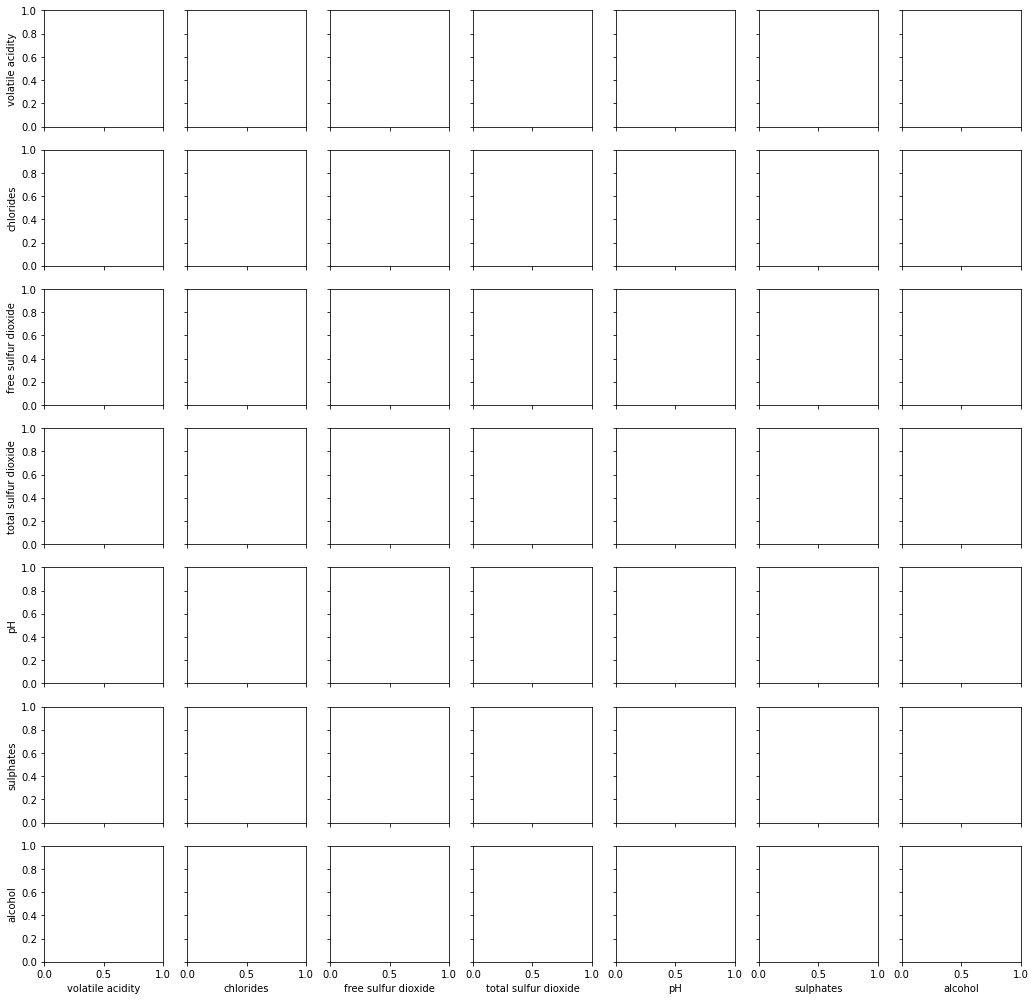

In [73]:
sns.pairplot(data[significant_columns], kind = 'reg', hue= 'quality')

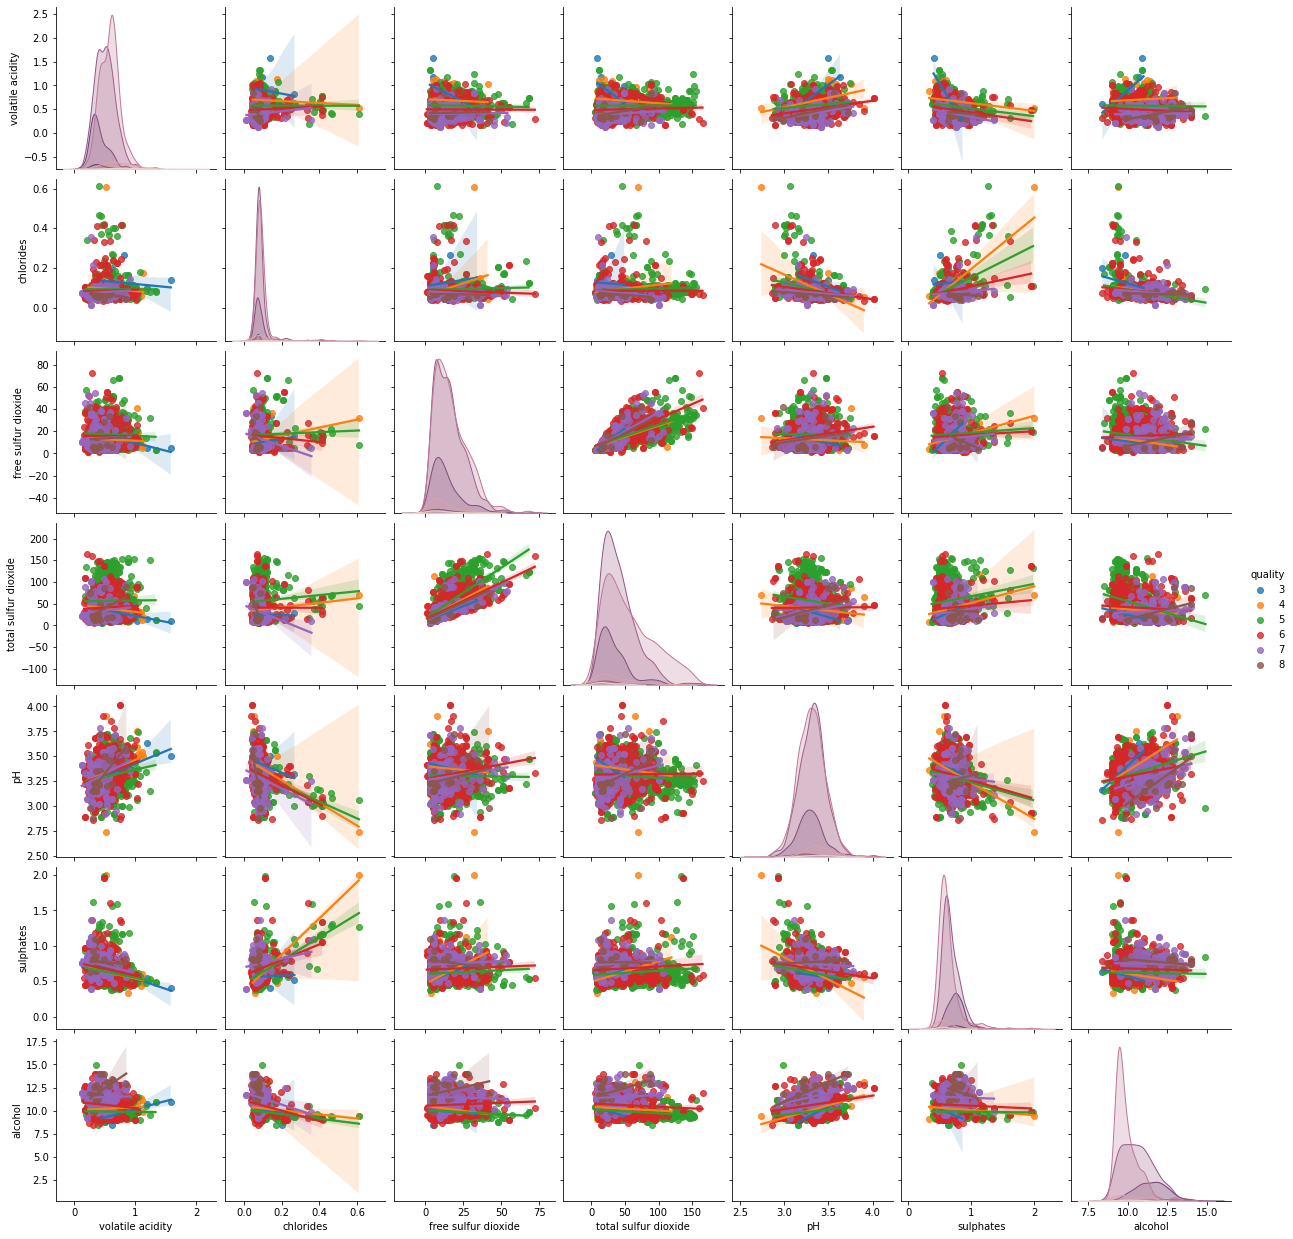

In [74]:
significant_columns.append('quality')

sns.pairplot(data[significant_columns], kind = 'reg', hue= 'quality')

In [75]:
# Logistic Regression

In [76]:
# Multiple regression, the dependent variable or the thing that you are trying to predict has multiple
# different values like what with quality, whereas with logistic regression trying to predict a value
# or variable that takes on only two values

In [77]:
# creating threshold that we can use to binaries the data

In [78]:
binthresh = np.mean(data['quality'])

data['quality']>binthresh

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1597, dtype: bool

In [79]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [81]:
data['binquality'] = data['quality']>binthresh

data

C:\Users\seroq\AppData\Local\Temp\ipykernel_9804\1763280296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binquality'] = data['quality']>binthresh


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,False


In [82]:
for key in data.keys():
    print(key)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality
binquality


In [83]:
# we want to keep all of these except for the last two

In [86]:
Xcols = []

for key in data.keys():
    if key not in ['quality', 'binquality']:
        Xcols.append(key)

Xcols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [90]:
model = sm.Logit(data['binquality'], data[Xcols])

results = model.fit(method='newton')

results.summary()

Optimization terminated successfully.
         Current function value: 0.516369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             binquality   No. Observations:                 1597
Model:                          Logit   Df Residuals:                     1586
Method:                           MLE   Df Model:                           10
Date:                Mon, 03 Apr 2023   Pseudo R-squ.:                  0.2525
Time:                        00:20:05   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -1103.2
Covariance Type:            nonrobust   LLR p-value:                2.601e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1020      0.063      1.609      0.108      -0.022       0.226
volatile acidity        -3.2749      0.485     -6.753      0.000      -4.225      -2.324
citric acid             -1.2889      0.565     -2.280      0.023      -2.397      -0.181
residual sugar           0.0292      0.044      0.671      0.502      -0.056       0.114
chlorides               -3.9542      1.564     -2.528      0.011      -7.020      -0.888
free sulfur dioxide      0.0264      0.008      3.144      0.002       0.010       0.043
total sulfur dioxide    -0.0189      0.003     -6.173      0.000      -0.025      -0.013
density                 -7.2770      2.362     -3.081      0.002     -11.907      -2.647
pH                      -0.4818      0.602     -0.800      0.424      -1.662       0.698
sulphates                2.8220      0.439      6.428      0.000       1.961       3.682
alcohol                  0.8804      0.074     11.856      0.000       0.735       1.026
========================================================================================
"""

In [92]:
significant_columnsL = list(results.pvalues[results.pvalues<.05].keys())

In [99]:
print("Significant predictors from the logistic regression:\n")
[print(" "+i) for i in significant_columnsL];

print("\nSignificant predictors from the standard regression:\n")
[print(" "+i) for i in significant_columns[:-1]]; # -1 for drop quality

Significant predictors from the logistic regression:

 volatile acidity
 citric acid
 chlorides
 free sulfur dioxide
 total sulfur dioxide
 density
 sulphates
 alcohol

Significant predictors from the standard regression:

 volatile acidity
 chlorides
 free sulfur dioxide
 total sulfur dioxide
 pH
 sulphates
 alcohol
